# Classification of a subset Image net data Transfer Learning from pre-trained Fashion MNIST CNN

---





ImageNet is an image database organized according to the WordNet hierarchy (currently only the nouns), in which each node of the hierarchy is depicted by hundreds and thousands of images. Currently we have an average of over five hundred images per node. We hope ImageNet will become a useful resource for researchers, educators, students and all of you who share our passion for pictures.

A subset of data on 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' have been collected from Imagenet.

The train and validation subsets can be combined to make a larger training set.



Note : -

For the sake of simplcity we have changed the format of the data and stored the data in a .npy format file.Which has the X_train , y_train ,X_test & y_test in a dictionary format.

# 1 .Load the dataset and Import the packages

Firstly, let's select TensorFlow version 2.x in colab

In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

As we are using google colab, we need to mount the google drive to load the data file

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Add path to the folder where your dataset is present

In [ ]:
project_path = '/content/drive/MyDrive/My_DL/S5/TakeHome/'

Let's load the dataset now

In [ ]:
import numpy as np

# Open the file as readonly
data = np.load(project_path + 'Img-Net_10.npy',allow_pickle='TRUE').item()

# Load the training, test and validation set
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']


# 2 . Perform exploratory analysis on the dataset

### 2 .a. Print out the datashape of train & test 

In [ ]:
# Declare variables

batch_size = 32 # 32 examples in a mini-batch, smaller batch size means more updates in one epoch
num_classes = 10 #
epochs = 200 # repeat 200 times
data_augmentation = True

print('X_train shape : ',X_train.shape)
print('y_train shape : ',len(y_train))
print('X_test shape : ',X_test.shape)
print('y_test shape : ',len(y_test))


X_train shape :  (6539, 28, 28)
y_train shape :  6539
X_test shape :  (1710, 28, 28)
y_test shape :  1710


In [ ]:
# Here are the classes in the dataset, as well as 10 random images from each

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### 2 .b.  Visualize a particular image

Label: Ankle boot


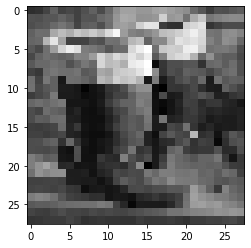

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (2,2))
%matplotlib inline
print("Label: {}".format(y_train[150]))
plt.imshow(X_train[150], cmap='gray')

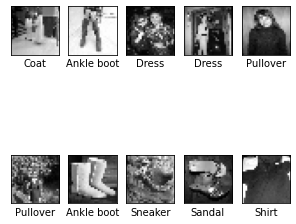

In [ ]:
# Print figure with 10 random images from each

fig = plt.figure(figsize=(5,5))
for i in range(num_classes):
  ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
  img_num = np.random.randint(X_train.shape[0])
  ax.imshow(X_train[img_num], cmap='gray')
  ax.set(xlabel=y_train[img_num])
 
plt.show()

### 2 .c.  Visualize a portion of the dataset

# 3 . Process the dataset

### 3 .a. Print the shape of training and testing data

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", len(y_train))
print("X_test shape:", X_test.shape)
print("y_test shape:", len(y_test))

X_train shape: (6539, 28, 28)
y_train shape: 6539
X_test shape: (1710, 28, 28)
y_test shape: 1710


In [ ]:
code = {'T-shirt/top' : 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4,
               'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}

In [ ]:
import pandas as pd

y_train_label = y_train
y_train = list(pd.Series(y_train).replace(code))
y_train = np.array(y_train)

y_test_label = y_test
y_test = list(pd.Series(y_test).replace(code))
y_test = np.array(y_test)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (6539,)
One value of y_train: 9


### 3 .b. Let's check out the dataset

Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot 
Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot 
Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot 
Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot 
Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot 
Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot 
Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot 
Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot 
Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot Ankle boot 
A

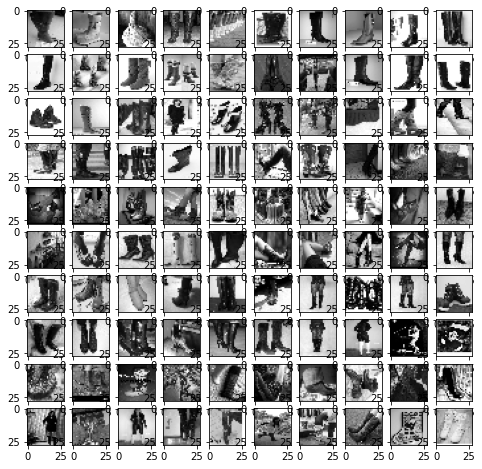

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

columns = 10
rows = 10

fig=plt.figure(figsize=(8, 8))

for i in range(1, columns*rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    print (y_test_label[i], end=' ')
    if i % columns == 0:
      print ("")
    plt.imshow(img, cmap='gray')

plt.show()

### 3 .c. Resize all the train and test inputs to 28X28, to match with MNIST CNN model's input size



### 3 .c.i. Preproccess the data

In [ ]:
# Importing OpenCV module for the resizing function
import cv2
import numpy as np

# Create a resized dataset for training and testing inputs with corresponding size
# Here we are resizing it to 28X28 (same input size as MNIST)
X_train_resized = np.zeros((X_train.shape[0], 28, 28))
for i in range(X_train.shape[0]):
  #using cv2.resize to resize each train example to 28X28 size using Cubic interpolation
  X_train_resized[i,:,:] = cv2.resize(X_train[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)

X_test_resized = np.zeros((X_test.shape[0], 28, 28))
for i in range(X_test.shape[0]):
  #using cv2.resize to resize each test example to 28X28 size using Cubic interpolation
  X_test_resized[i,:,:] = cv2.resize(X_test[i], dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
  
# We don't need the original dataset anynmore so we can clear up memory consumed by original dataset
del(X_train, X_test)

### 3 .c.ii. Reshape train and test sets into compatible shapes
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [ ]:
X_train = X_train_resized.reshape(X_train_resized.shape[0], 28, 28,1)
X_test = X_test_resized.reshape(X_test_resized.shape[0], 28, 28,1)

We can delete X_train_resized and X_test_resized variables as we are going to use X_train and X_test variables going further

In [ ]:
del(X_train_resized, X_test_resized)

### 3 .c.iii. Normalize data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes with 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

### 2 .c.iv.  Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [ ]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (6539, 28, 28, 1)
Images in X_train: 6539
Images in X_test: 1710


### 3 .c.vi.  One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (6539, 10)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Let's see one example after one-hot encoding

### 3 .d. Visualize an iage from the data

Label:  Ankle boot


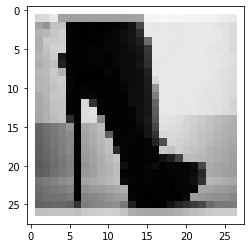

In [ ]:
print("Label: ", y_train_label[100])
plt.imshow(X_train[100].reshape(28,28), cmap='gray')

# 4 .  Build a classification model for the dataset

### 4 .a. Vanilla CNN + Pooling + Dropout

### Initialize a sequential model again
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

### 4 .b. Make only dense layers trainable
- freeze the initial convolutional layer weights and train only the dense (FC) layers
- set trainalble = False for all layers other than Dense layers

In [ ]:
for layers in model.layers:
    if('dense' not in layers.name):
        layers.trainable = False
    if('dense' in layers.name):
        print(layers.name + ' is trained')

dense_2 is trained
dense_3 is trained


### 4 .c.  Load pre-trained weights from Fashion MNIST CNN model
- load the file named `fashion_MNIST_weights.h5`

In [ ]:
model.load_weights(project_path + 'fashion_MNIST_weights.h5')

### 4 .d.  Compile the model
- loss: "categorical_crossentropy"
- metrics: "accuracy"
- optimizer: "adam"

In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# 5 . Evaluate this model

In [ ]:
model.evaluate(X_test, y_test)

54/54 [==============================] - 1s 14ms/step - loss: 5.5857 - accuracy: 0.0835


[5.1044511795043945, 0.08830409497022629]

# 6 . Training the CNN 

### 6 .a. Fit the model to the CINIC-10 dataset
- Use early stopping
- fit the model
    - give train data - training features and labels
    - batch size: 32
    - epochs: 10
    - give validation data - testing features and labels

In [ ]:
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
model.fit(x=X_train, y=y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/15
205/205 [==============================] - 5s 22ms/step - loss: 2.2572 - accuracy: 0.2444 - val_loss: 2.1138 - val_accuracy: 0.2520
Epoch 2/15
205/205 [==============================] - 5s 22ms/step - loss: 1.8391 - accuracy: 0.3735 - val_loss: 1.9970 - val_accuracy: 0.3181
Epoch 3/15
205/205 [==============================] - 5s 24ms/step - loss: 1.6226 - accuracy: 0.4510 - val_loss: 1.9456 - val_accuracy: 0.3386
Epoch 4/15
205/205 [==============================] - 5s 24ms/step - loss: 1.4258 - accuracy: 0.5148 - val_loss: 1.9268 - val_accuracy: 0.3532
Epoch 5/15
205/205 [==============================] - 5s 23ms/step - loss: 1.2398 - accuracy: 0.5920 - val_loss: 1.8904 - val_accuracy: 0.3842
Epoch 6/15
205/205 [==============================] - 5s 23ms/step - loss: 1.0600 - accuracy: 0.6525 - val_loss: 1.9488 - val_accuracy: 0.3749
Epoch 7/15
205/205 [==============================] - 5s 23ms/step - loss: 0.8948 - accuracy: 0.7172 - val_loss: 2.0393 - val_accuracy: 0.3661

# 7 . Evaluate this model 

### 7 .a. Final loss and accuracy

In [ ]:
model.evaluate(X_test, y_test)

54/54 [==============================] - 1s 15ms/step - loss: 2.0393 - accuracy: 0.3661


[2.0392954349517822, 0.3660818636417389]

### 7 .b. Visualizing some predictions

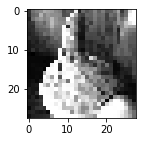

Preiction for above image:  Sneaker


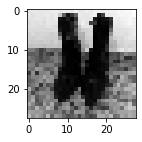

Preiction for above image:  Ankle boot


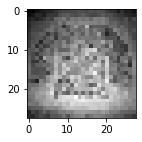

Preiction for above image:  Pullover


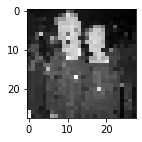

Preiction for above image:  Sneaker


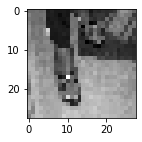

Preiction for above image:  Ankle boot


In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[3].reshape(28,28), cmap='gray')
plt.show()
print("Preiction for above image: ", class_names[np.argmax(model.predict(X_test[3].reshape(1,28,28,1)))])


plt.figure(figsize=(2,2))
plt.imshow(X_test[50].reshape(28,28), cmap='gray')
plt.show()
print("Preiction for above image: ", class_names[np.argmax(model.predict(X_test[50].reshape(1,28,28,1)))])


plt.figure(figsize=(2,2))
plt.imshow(X_test[700].reshape(28,28), cmap='gray')
plt.show()
print("Preiction for above image: ", class_names[np.argmax(model.predict(X_test[700].reshape(1,28,28,1)))])


plt.figure(figsize=(2,2))
plt.imshow(X_test[590].reshape(28,28), cmap='gray')
plt.show()
print("Preiction for above image: ", class_names[np.argmax(model.predict(X_test[590].reshape(1,28,28,1)))])


plt.figure(figsize=(2,2))
plt.imshow(X_test[800].reshape(28,28), cmap='gray')
plt.show()
print("Preiction for above image: ", class_names[np.argmax(model.predict(X_test[800].reshape(1,28,28,1)))])

# 8 . Saving the CNN
- Save the trained weights and model in h5 files

In [ ]:
! pwd

/content


In [ ]:
%cd /content/drive/MyDrive/My_DL/S5/TakeHome/

/content/drive/MyDrive/My_DL/S5/TakeHome


In [ ]:
! pwd

/content/drive/MyDrive/My_DL/S5/TakeHome


In [ ]:
#Set the path where you want to store the model and weights 
model.save('cnn_ImgNet.h5')
model.save_weights('cnn_ImgNet_weights.h5')